In [2]:
# =====================
# Importa Bibliotecas
import random
import string
import time
from collections import deque
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# =====================
# Gerador de dados
def gerar_chave_cliente():
    return "C" + ''.join(random.choices(string.digits, k=3))

def gerar_dados_entrada_escala(qtd_produtos, tamanho_min=10, tamanho_max=10000):
    dados = []
    for _ in range(qtd_produtos):
        chave = gerar_chave_cliente()
        tipo = random.choice([1, 2])
        tamanho = random.randint(tamanho_min, tamanho_max)
        dados.append({
            "chave_cliente": chave,
            "tipo_produto": tipo,
            "tamanho": tamanho
        })
    return dados

def receber_dados_inspecao(dados_entrada):
    print(f"\nRecebendo {len(dados_entrada)} produtos para inspeção...\n")
    # Visualização resumida para grandes listas
    for i, produto in enumerate(dados_entrada[:10], 1):
        print(f"[{i}] Cliente: {produto['chave_cliente']}, Tipo: {produto['tipo_produto']}, Tamanho: {produto['tamanho']}")
    if len(dados_entrada) > 10:
        print(f"... ({len(dados_entrada) - 10} produtos não exibidos) ...")
    return dados_entrada

def exibir_lista_dados(dados_entrada):
    df = pd.DataFrame(dados_entrada)
    print("\nLista de produtos fornecidos ao sistema (primeiros 10):\n")
    print(df.head(10).to_string(index=False))

In [4]:
# =====================
# Estruturas PILHA e FILA para processamento

class Pilha:
    def __init__(self):
        self.itens = []

    def push(self, item):
        self.itens.append(item)

    def pop(self):
        return self.itens.pop() if self.itens else None

    def is_empty(self):
        return len(self.itens) == 0

class Fila:
    def __init__(self):
        self.itens = deque()

    def enqueue(self, item):
        self.itens.append(item)

    def dequeue(self):
        return self.itens.popleft() if self.itens else None

    def is_empty(self):
        return len(self.itens) == 0

In [5]:
# =====================
# Módulo de Inspeção

def inspecao_tipo1(tamanho):
    pilha = Pilha()
    pilha.push(tamanho)
    tempo = 0
    while not pilha.is_empty():
        atual = pilha.pop()
        if atual > 1:
            tempo += 2  # 1h preparo + 1h inspeção metade
            pilha.push(atual // 2)
            pilha.push(atual // 2)
        else:
            tempo += 1  # Inspeção parte mínima
    return tempo

def inspecao_tipo2(tamanho):
    fila = Fila()
    for i in range(tamanho, 0, -1):
        fila.enqueue(i)
    tempo = 0
    while not fila.is_empty():
        tempo += fila.dequeue()
    return tempo

def modulo_inspecao(lista_produtos):
    resultados = []
    for produto in lista_produtos:
        if produto['tipo_produto'] == 1:
            tempo = inspecao_tipo1(produto['tamanho'])
        else:
            tempo = inspecao_tipo2(produto['tamanho'])
        novo_produto = produto.copy()
        novo_produto['tempo_inspecao'] = tempo
        resultados.append(novo_produto)
    return resultados

In [6]:
# =====================
# Busca binária para busca otimizada no módulo controle

def busca_binaria(lista, tamanho):
    esquerda, direita = 0, len(lista) - 1
    while esquerda <= direita:
        meio = (esquerda + direita) // 2
        if lista[meio]['tamanho'] == tamanho:
            return lista[meio]
        elif lista[meio]['tamanho'] < tamanho:
            esquerda = meio + 1
        else:
            direita = meio - 1
    return None

In [7]:
# =====================
# Módulo de Controle com busca binária

class EstoqueControle:
    def __init__(self):
        self.estoque = {}

    def insere(self, chave_cliente, produto):
        if chave_cliente not in self.estoque:
            self.estoque[chave_cliente] = []
        lista = self.estoque[chave_cliente]

        # Inserção mantendo lista ordenada pelo tamanho do produto
        pos = 0
        while pos < len(lista) and lista[pos]['tamanho'] < produto['tamanho']:
            pos += 1
        lista.insert(pos, produto)

    def busca_produto(self, chave_cliente, tamanho):
        if chave_cliente in self.estoque:
            lista = self.estoque[chave_cliente]
            return busca_binaria(lista, tamanho)
        return None

In [8]:
# =====================
# Módulo de Monitoramento e Simulação

def simular_execucao(qtds_produtos, tamanho_min, tamanho_max):
    tempos_inspecao = []
    tempos_controle = []

    for qtd in qtds_produtos:
        dados = gerar_dados_entrada_escala(qtd, tamanho_min, tamanho_max)

        # Receber dados
        receber_dados_inspecao(dados)

        # Inspeção
        start_time = time.time()
        resultados = modulo_inspecao(dados)
        duracao_inspecao = time.time() - start_time
        tempos_inspecao.append(duracao_inspecao)

        # Controle
        estoque = EstoqueControle()
        start_time = time.time()
        for produto in resultados:
            estoque.insere(produto['chave_cliente'], produto)
        # Busca simulada para avaliação (busca o primeiro produto)
        if resultados:
            estoque.busca_produto(resultados[0]['chave_cliente'], resultados[0]['tamanho'])
        duracao_controle = time.time() - start_time
        tempos_controle.append(duracao_controle)

        print(f"Simulação: {qtd} produtos, inspeção demorou {duracao_inspecao:.4f}s, "
              f"controle demorou {duracao_controle:.4f}s")

    # Gráfico dos tempos
    plt.figure(figsize=(12,6))
    plt.plot(qtds_produtos, tempos_inspecao, label='Tempo Inspeção (s)')
    plt.plot(qtds_produtos, tempos_controle, label='Tempo Controle (s)')
    plt.xlabel('Quantidade de Produtos')
    plt.ylabel('Tempo (segundos)')
    plt.title(f'Desempenho do Sistema para produtos tamanho entre {tamanho_min} e {tamanho_max}')
    plt.legend()
    plt.grid(True)
    plt.show()


Recebendo 10 produtos para inspeção...

[1] Cliente: C314, Tipo: 1, Tamanho: 1722
[2] Cliente: C309, Tipo: 1, Tamanho: 4577
[3] Cliente: C852, Tipo: 1, Tamanho: 352
[4] Cliente: C392, Tipo: 1, Tamanho: 8919
[5] Cliente: C793, Tipo: 1, Tamanho: 9145
[6] Cliente: C120, Tipo: 1, Tamanho: 1553
[7] Cliente: C505, Tipo: 1, Tamanho: 2569
[8] Cliente: C646, Tipo: 1, Tamanho: 6690
[9] Cliente: C988, Tipo: 2, Tamanho: 6397
[10] Cliente: C181, Tipo: 1, Tamanho: 1988
Simulação: 10 produtos, inspeção demorou 0.0693s, controle demorou 0.0000s

Recebendo 100 produtos para inspeção...

[1] Cliente: C113, Tipo: 2, Tamanho: 8827
[2] Cliente: C656, Tipo: 2, Tamanho: 1673
[3] Cliente: C653, Tipo: 2, Tamanho: 5832
[4] Cliente: C300, Tipo: 1, Tamanho: 4635
[5] Cliente: C145, Tipo: 1, Tamanho: 7117
[6] Cliente: C477, Tipo: 1, Tamanho: 6005
[7] Cliente: C624, Tipo: 2, Tamanho: 1184
[8] Cliente: C741, Tipo: 1, Tamanho: 2276
[9] Cliente: C782, Tipo: 1, Tamanho: 4430
[10] Cliente: C610, Tipo: 2, Tamanho: 9331
.

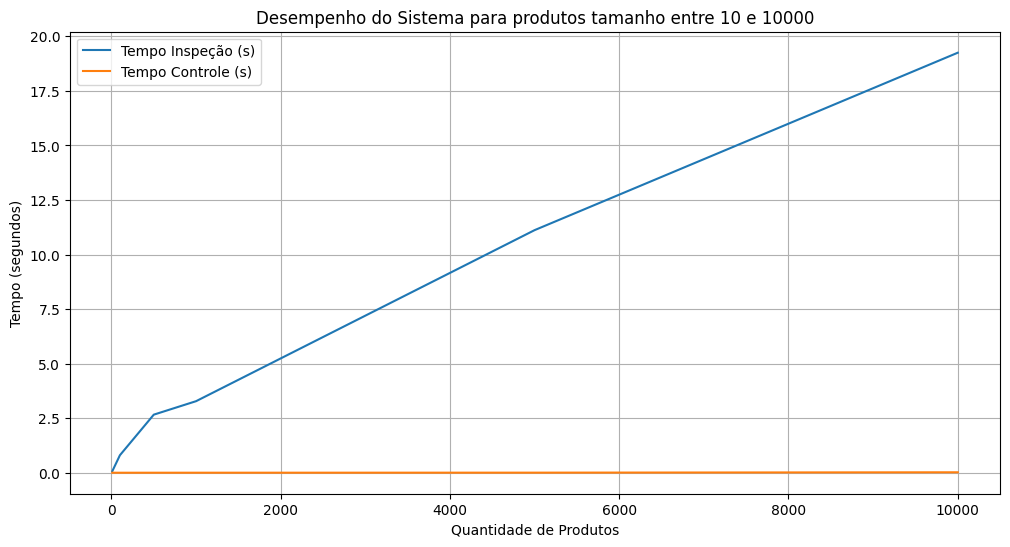

In [9]:
# =====================
# Exemplo de execução da simulação escalonada

if __name__ == "__main__":
    qtds_produtos = [10, 100, 500, 1000, 5000, 10000]
    tamanho_min = 10
    tamanho_max = 10000
    simular_execucao(qtds_produtos, tamanho_min, tamanho_max)
